# How to Normalize & Standardize Randomly Generated Data

Some machine learning algorithms will achieve better performance if your data has a consistent scale or distribution.

Two techniques that you can use to consistently rescale your data are normalization and standardization.

In [1]:
# Lets get the 1-D data using numpy as follows:
import numpy as np
def genarate_data():
    return np.random.randn(10000)

data = genarate_data()

## Analysing the Distribution of Random Generated Data

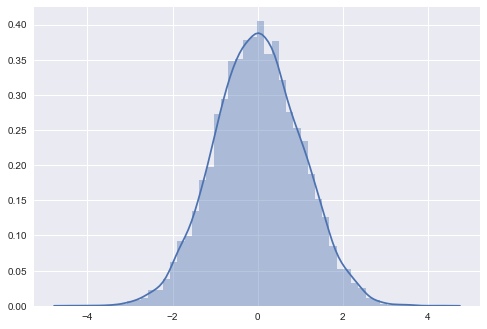

In [2]:
# Now we will check if the distribution is normal or not.
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(data)


plt.show()

## Analysing the Distribution using Q-Q Plot

The Q-Q plot, or quantile-quantile plot, is a graphical tool to help us assess if a set of data plausibly came from some theoretical distribution such as a Normal or exponential. For example, if we run a statistical analysis that assumes our dependent variable is Normally distributed, we can use a Normal Q-Q plot to check that assumption.

Q-Q plots take your sample data, sort it in ascending order, and then plot them versus quantiles calculated from a theoretical distribution. The number of quantiles is selected to match the size of your sample data. While Normal Q-Q Plots are the ones most often used in practice due to so many statistical methods assuming normality, Q-Q Plots can actually be created for any distribution. 

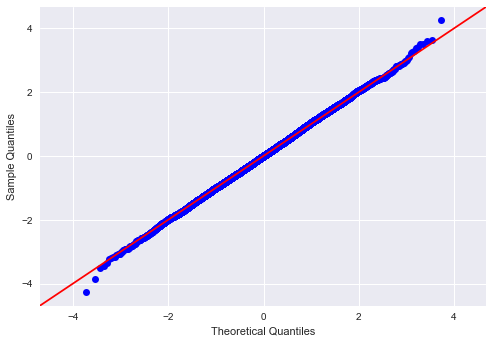

In [4]:
import statsmodels.api as sm
import pylab

sm.qqplot(data, line='45')
plt.show()

In [5]:
# It is clear that the data we have, is having the Gausian Distribution.
# Now lets try to normalize (N) and standardize (S) the data and /
#plot (pdf plots) of the same.

## Normalizing the data

Normalization is a rescaling of the data from the original range so that all values are within the range of 0 and 1.

A value is normalized as follows:

y = (x - min) / (max - min)

Where the minimum and maximum values pertain to the value x being normalized.

You can see that if an 'x' value is provided that is outside the bounds of the minimum and maximum values, then the resulting value will not be in the range of 0 and 1. You could check for these observations prior to making predictions and either remove them from the dataset or limit them to the pre-defined maximum or minimum values.

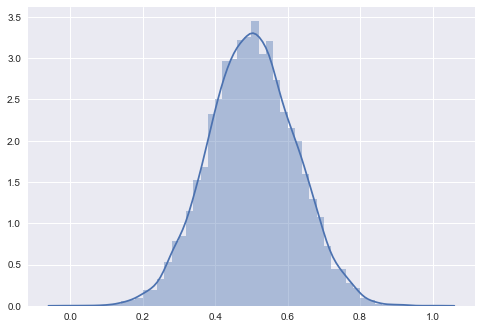

In [6]:
# First we will normalize the data.
# A value is normalized as follows:
# value = (value - min)/(max - min)
denominator = max(data) - min(data)
normalize = []
for i in range(0,len(data)):
    normalize.append((data[i] - min(data))/denominator)

sns.distplot(normalize)
plt.show()

## Sandardizing the Data

Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1. This can be thought of as subtracting the mean value or centering the data.

Standardization assumes that your observations fit a Gaussian distribution (bell curve) with a well behaved mean and standard deviation. You can still standardize your data if this expectation is not met, but you may not get reliable results.

A value is standardized as follows:
y = (x - mean) / standard_deviation

Like normalization, standardization can be useful, and even required in some machine learning algorithms when your data has input values with differing scales.

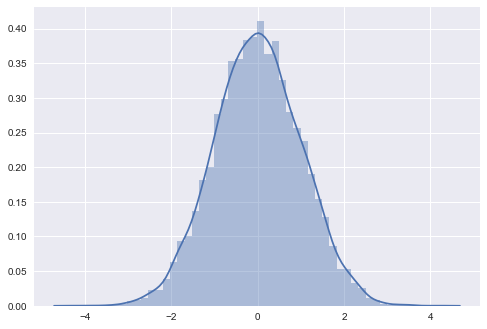

In [7]:
# Now we will standardize the data.
# A value is standardized as follows:
# value = (value - mean) / standard_deviation

def variance(data):
    m = sum(data)/float(len(data))
    v=0
    for i in data:
        v+=(i - m)**2
    return v/float(len(data))

def std_dev(variance):
    return variance**0.5

m = sum(data)/float(len(data))
var = variance(data)
sd = std_dev(var)
standardize = []
for i in range(0, len(data)):
    standardize.append((data[i] - m)/sd)

sns.distplot(standardize)
plt.show()

## Expectation of Normalized and Standardized Data

Expectation of a normal distribution is the mean of that data.

In [8]:
print "Expectation of Normalized data is %f" % (sum(normalize)/len(normalize))

print "Expectation of Standardized data is %f" % (sum(standardize)/len(standardize))

Expectation of Normalized data is 0.501939
Expectation of Standardized data is 0.000000
